# Exploring text classification methods for Tweet classification 

In [1]:
!pip install wordcloud
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

## Exploratory Analysis

### A quick look at our data

Let's look at our data... first, an example of what is NOT a disaster tweet.

In [3]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

****And one that is:

In [4]:
train_df[train_df["target"] == 1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [3]:
train_has_keyword_df = train_df[train_df.keyword.notnull()]
train_has_location_df = train_df[train_df.location.notnull()]
train_has_keyword_df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [10]:
text = " ".join(keyword for keyword in train_has_keyword_df.keyword)
print ("There are {} words in the combination of all keywords.".format(len(text)))

There are 73534 words in the combination of all keywords.


## wordclouds

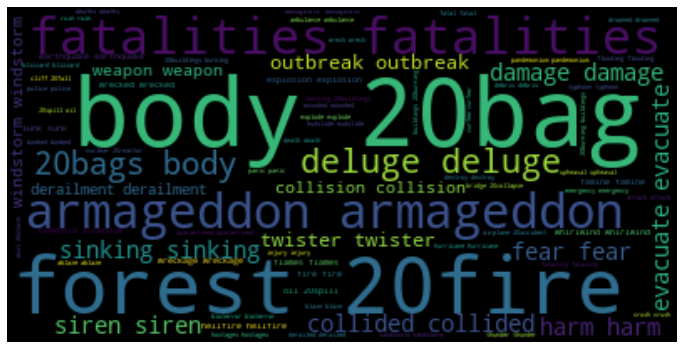

In [11]:
def renderWordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    F = plt.gcf()
    Size = F.get_size_inches()
    F.set_size_inches(Size[0]*2, Size[1]*2, forward=True) # Set forward to True to resize window along with plot in figure.
    plt.show()
renderWordcloud(text)

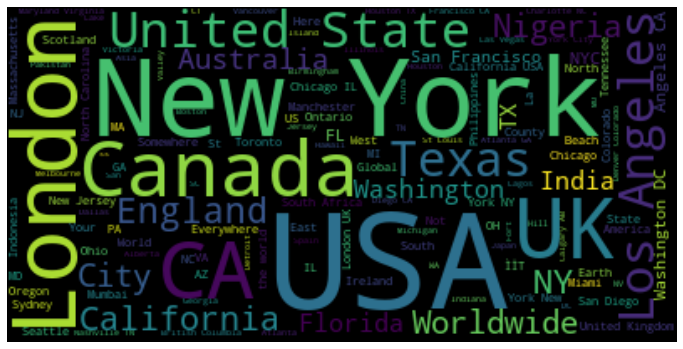

In [12]:
text = " ".join(keyword for keyword in train_has_location_df.location)
renderWordcloud(text)

In [13]:
text

"Birmingham Est. September 2012 - Bristol AFRICA Philadelphia, PA London, UK Pretoria World Wide!! Paranaque City Live On Webcam milky way GREENSBORO,NORTH CAROLINA Live On Webcam England. Sheffield Township, Ohio India Barbados Anaheim Abuja USA South Africa Sao Paulo, Brazil hollywoodland  Edmonton, Alberta - Treaty 6 Inang Pamantasan Twitter Lockout in progress Concord, CA Calgary, AB Birmingham San Francisco CLVLND Nashville, TN Santa Clara, CA UK St. Louis, MO Walker County, Alabama Australia North Carolina Norf Carolina San Mateo County, CA North Carolina Njoro, Kenya Your Sister's Bedroom Arlington, TX South Bloomfield, OH New Hanover County, NC Maldives Manchester, NH Wilmington, NC New Hanover County, NC global Alberta | Sask. | Montana Charlotte Baton Rouge, LA Hagerstown, MD Gloucestershire , UK UK Nairobi, Kenya Instagram - @heyimginog  304 Switzerland 304 US 304 Instagram - @heyimginog  304 Somewhere Only We Know ? Belgium Switzerland US dope show Switzerland Switzerland O

## Unique words

In [14]:
len(train_has_keyword_df.keyword.unique())

221

In [15]:
len(train_has_location_df.location.unique())

3341

## Relationship between categorical vars & target

### relationship between keyword and target

In [16]:
group_keyword_sum_target = train_has_keyword_df.groupby("keyword").sum().sort_values("target")
group_keyword_len = train_has_keyword_df.groupby("keyword").count()
group_keyword_sum_target#['true/all'] = group_keyword_sum_target.target / group_keyword_len.target

,id,target
keyword,,
aftershock,5825,0
ruin,309586,1
blazing,34048,1
body%20bag,46224,1
electrocute,141501,1
...,...,...
debris,115672,37
oil%20spill,285789,37
outbreak,302788,39


In [17]:
pd.set_option('display.max_rows', None)
group_keyword_sum_target

,id,target
keyword,,
aftershock,5825,0
ruin,309586,1
blazing,34048,1
body%20bag,46224,1
electrocute,141501,1
body%20bags,61654,1
epicentre,56451,1
traumatised,345808,2
threat,105065,2


### correlation between keyword and Target

#### contigency table

In [18]:
df_target_1 = train_has_keyword_df['target']==1
df_target_1.head()

31     True
32    False
33     True
34    False
35    False
Name: target, dtype: bool

In [19]:
pd.crosstab(train_has_keyword_df['keyword'], [df_target_1], rownames=['keyword'], colnames=['target'])

target,False,True
keyword,,
ablaze,23,13
accident,11,24
aftershock,34,0
airplane%20accident,5,30
ambulance,18,20
annihilated,23,11
annihilation,19,10
apocalypse,23,9
armageddon,37,5


### relationship between location and target: percentage of true targets per location

In [20]:
group_location_sum_target = train_has_location_df.groupby("location").sum().sort_values("target")
group_location_len = train_has_location_df.groupby("location").count()
group_location_sum_target['true/all'] = group_location_sum_target.target / group_location_len.target

In [21]:
group_location_sum_target

,id,target,true/all
location,,,
Mid West,7433,0,0.000000
"Kuala Lumpur, Malaysia",4546,0,0.000000
University of South Florida,5356,0,0.000000
University of Toronto,337,0,0.000000
Korea,15200,0,0.000000
Konoha,1017,0,0.000000
"Kolkata, India",2309,0,0.000000
Unknown,8642,0,0.000000
Unnamed City,2456,0,0.000000


In [22]:
pd.set_option('display.max_rows', 20)

### How are numbers formatted in tweets?

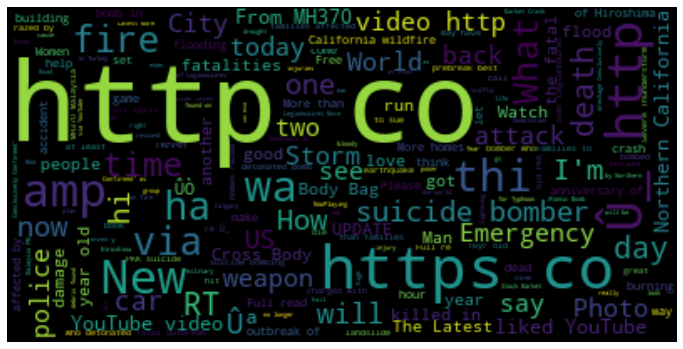

In [23]:
import re
pattern = re.compile("[0-9]")
numbers_df = train_df[train_df['text'].str.contains('[0-9]', regex= True, na=False)]
number_texts = [keyword if pattern.search(keyword) else None for keyword in numbers_df.text]
text = " ".join(number_texts)
renderWordcloud(text)






In [24]:
text

"13,000 people receive #wildfires evacuation orders in California  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count  Damage to school bus on 80 in multi car crash #BREAKING  @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA Barbados #Bridgetown JAMAICA \x89ÛÒ Two cars set ablaze: SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw I wanted to set Chicago ablaze with my preaching... But not my hotel! http://t.co/o9qk

In [25]:
if pattern.search("12 kids"):
    print('holis')

holis


# Models

### Building vectors

The theory behind the model we'll build in this notebook is pretty simple: the words contained in each tweet are a good indicator of whether they're about a real disaster or not (this is not entirely correct, but it's a great place to start).

We'll use scikit-learn's `CountVectorizer` to count the words in each tweet and turn them into data our machine learning model can process.

Note: a `vector` is, in this context, a set of numbers that a machine learning model can work with. We'll look at one in just a second.

In [26]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])

In [27]:
## we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [28]:
example_train_vectors[4]

<1x54 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

The above tells us that:
1. There are 54 unique words (or "tokens") in the first five tweets.
2. The first tweet contains only some of those unique tokens - all of the non-zero counts above are the tokens that DO exist in the first tweet.

Now let's create vectors for all of our tweets.

In [29]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test_df["text"])

### Our model

As we mentioned above, we think the words contained in each tweet are a good indicator of whether they're about a real disaster or not. The presence of particular word (or set of words) in a tweet might link directly to whether or not that tweet is real.

What we're assuming here is a _linear_ connection. So let's build a linear model and see!

In [30]:
## Our vectors are really big, so we want to push our model's weights
## toward 0 without completely discounting different words - ridge regression 
## is a good way to do this.
clf = linear_model.RidgeClassifier()

Let's test our model and see how well it does on the training data. For this we'll use `cross-validation` - where we train on a portion of the known data, then validate it with the rest. If we do this several times (with different portions) we can get a good idea for how a particular model or method performs.

The metric for this competition is F1, so let's use that here.

In [31]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
np.mean(scores)

0.6000883538458055

* The above scores aren't terrible! It looks like our assumption will score roughly 0.65 on the leaderboard. There are lots of ways to potentially improve on this (TFIDF, LSA, LSTM / RNNs, the list is long!) - give any of them a shot!

In the meantime, let's do predictions on our training set and build a submission for the competition.

In [32]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [33]:
sample_submission = pd.read_csv("./data/sample_submission.csv")




In [34]:
sample_submission["target"] = clf.predict(test_vectors)

In [35]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [36]:
sample_submission.to_csv("submission.csv", index=False)

Now, in the viewer, you can submit the above file to the competition! Good luck!

# Exploring other models

### use keywords for prediction

In [37]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_replaced_na_keyword = train_df.copy()
train_replaced_na_keyword['keyword'] = train_df['keyword'].fillna(' ')
train_vectors = count_vectorizer.fit_transform(train_replaced_na_keyword["keyword"])


In [38]:
train_replaced_na_keyword

,id,keyword,location,text,target
0,1,,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,,NaN,All residents asked to 'shelter in place' are ...,1
3,6,,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,NaN,Police investigating after an e-bike collided ...,1


In [39]:
train_vectors[1].todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [40]:
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
np.mean(scores)



0.25351098060912564

### use tweet text in combination with keyword

In [41]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_textandkeyword_df = train_df.copy()
train_textandkeyword_df['keyword'] = train_df['keyword'].fillna(' ')
train_textandkeyword_df['textandkeyword'] = train_textandkeyword_df['text'] + " // " + train_textandkeyword_df['keyword']
train_vectors = count_vectorizer.fit_transform(train_textandkeyword_df["textandkeyword"])

In [42]:
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
np.mean(scores)



0.5657085536592693

#### same model but don't include keywords in the vectors

In [43]:
clf = linear_model.RidgeClassifier()
train_vectors = count_vectorizer.fit_transform(train_textandkeyword_df["text"])
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
np.mean(scores)


0.6000883538458055

### Use TF-IDF to highlight important words in the text

Select top 10 words from every tweet using TF-IDF and feed them to a classifier

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
train_vectors = vectorizer.fit_transform(train_df["text"])
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
np.mean(scores)

0.611926795197027

not removing stop words is better:

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_df["text"])
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
np.mean(scores)

0.6434434582828604

## Best model so far: ridge classifier using TF-IDF for text encoding

In [46]:
from sklearn.pipeline import Pipeline
clf = linear_model.RidgeClassifier()
pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('predictor', clf)])
scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)


0.6696623671326495

### Evaluate multiple classifiers

In [47]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator = linear_model.RidgeClassifier()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC





clf = linear_model.RidgeClassifier()
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('clf', ClfSwitcher())])



parameters = [
    {
        'clf__estimator': [SVC()],
    },
    {
        'clf__estimator': [SGDClassifier()],
    },
    {
        'clf__estimator': [MultinomialNB()],
    },
    {
        'clf__estimator': [linear_model.RidgeClassifier()],
    },
    {
        'clf__estimator': [MLPClassifier(random_state=1, max_iter=200, early_stopping=True)],
    },
    {
        'clf__estimator': [RandomForestClassifier()]
    }
]


gscv = GridSearchCV(pipeline, parameters, cv=3, n_jobs=12, return_train_score=True, verbose=3, scoring='f1')
gscv.fit(train_df["text"], train_df["target"])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  18 | elapsed:    4.4s remaining:   35.2s
[Parallel(n_jobs=12)]: Done   9 out of  18 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=12)]: Done  16 out of  18 | elapsed:   32.8s remaining:    4.1s


KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(gscv.cv_results_)

In [ ]:
df

best classifier: MultinomialNB

In [ ]:
clf = MultinomialNB()
pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('predictor', clf)])
scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)




hyperparameter search for MultinomialNB

In [ ]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])



parameters = [
    {
        'clf__alpha': [1, 0, 0.5],
        'clf__fit_prior': [True, False]
    },
]


gscv = GridSearchCV(pipeline, parameters, cv=3, n_jobs=12, return_train_score=True, verbose=3, scoring='f1')
gscv.fit(train_df["text"], train_df["target"])

In [ ]:
df = pd.DataFrame(gscv.cv_results_)
df

In [ ]:
clf = MultinomialNB(fit_prior=False)
pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('predictor', clf)])
scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

# Experiment with new ways of encoding the text

## Fast-text

In [ ]:
import random
def randvec(w, n=50, lower=-1.0, upper=1.0):
    """Returns a random vector of length `n`. `w` is ignored."""
    return np.array([random.uniform(lower, upper) for i in range(n)])

In [ ]:
%%time
!pip install gensim
import gensim
import gensim.downloader as api
from nltk import ngrams
from gensim.models.keyedvectors import FastTextKeyedVectors
fastText_model = api.load("fasttext-wiki-news-subwords-300")  

def get_oov_fasttext(w):
    twograms = ngrams(w, 2)
    vectors = []
    for gram in twograms:
        word_2gram = gram[0] + gram[1]
        if word_2gram in fastText_model:
            vectors.append(fastText_model[word_2gram])
    if(len(vectors) > 0):
        return np.sum(vectors, axis=0)
    else:
        return randvec(w, n=300)
def fasttext_vec(w):    
    """Return `w`'s fastext representation if available, else return 
    a random vector."""
    if(w in fastText_model):
        return fastText_model[w]
    else:
        return get_oov_fasttext(w)
    

In [ ]:
from typing import Callable, List, Optional, Tuple

import pandas as pd
from sklearn.base import TransformerMixin, BaseEstimator

class FastTextTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, combine_strategy="concatenate", max_sentence_length=30):
        assert (combine_strategy=="concatenate" or combine_strategy=='mean')
        self.combine_strategy = combine_strategy
        self.max_sentence_length = max_sentence_length
        self.empty_word_token = "EOF"
        
    def transform(self, text_list):
        texts = text_list.tolist()
        result = [];
        for text in texts:
            vectors = [];
            words = text.split()
            if(self.combine_strategy == 'concatenate'):
                max_index = self.max_sentence_length
            else:
                max_index = len(words) 
            for index in range(max_index):
                if(len(words) > index):
                    word = words[index]
                else:
                    word = self.empty_word_token
                vectors.append(fasttext_vec(word))
            if(self.combine_strategy == 'concatenate'):
                result.append(np.concatenate(vectors))
            elif(self.combine_strategy == 'mean'):
                result.append(np.mean(vectors, axis=0))
        return result;

    def fit(self, X, y=None):
        """No fitting necessary so we just return ourselves"""
        return self

In [ ]:
clf = SGDClassifier()
pipe = Pipeline([('vectorizer', FastTextTransformer(combine_strategy='concatenate')), ('predictor', clf)])
scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)



In [ ]:
clf = SGDClassifier()
pipe = Pipeline([('vectorizer', FastTextTransformer(combine_strategy='mean')), ('predictor', clf)])
scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

Compare same model using TF-IDF rather than fast-text for encoding

In [ ]:
clf = SGDClassifier()
pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('predictor', clf)])
scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

Encoding text with TF-IDF vectorizer proves better than fast-text, which makes sense because TF-IDF helps our model pay attention to important words, while fast-text doesn't. follow up work could compare both encoding methods with a model that has attention mechanism! 

## Experiment with common pre-processing techniques:

In [50]:
# normalise has several nltk data dependencies. Install these by running the following python commands:

import nltk
for dependency in ("brown", "names", "wordnet", "averaged_perceptron_tagger", "universal_tagset"):
    nltk.download(dependency)

[nltk_data] Downloading package brown to /Users/pablo/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to /Users/pablo/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/pablo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pablo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/pablo/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [51]:
!pip install sklearn
!pip install nltk
!pip install unidecode
!pip install normalise
!pip install contractions
import os
import string
os.system('python3 -m spacy download en')# it doesnt work when running directly on terminal
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin, BaseEstimator
import spacy
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
import nltk
import unidecode
from normalise import normalise
import contractions
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words("english")



def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text

def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    return contractions.fix(text);

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',str(text))


def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)


def remove_punctuation(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

#FIXME: for lemmatizing, normalizing and removing stop words we tokenize the text and then join all the tokens using Python String.join, when doing this info like some punctuation marks are dropped which reduces model's accuracy
#If you find a way to over come this problem please let me know in the comments!
def text_normalizer(comment, lemmatize, lowercase, remove_stopwords, remove_accents, normalize_contractions, normalize_URL, normalize_emoji, normalize_html, normalize_punctuation):
    if lowercase:
        comment = comment.lower()
    if(remove_accents):
        comment = remove_accented_chars(comment)
    if(normalize_contractions):
        comment = expand_contractions(comment)
    if(normalize_URL):
        comment = remove_URL(comment)
    if(normalize_emoji):
        comment = remove_emoji(comment)   
    if(normalize_html):
        comment = remove_html(comment)   
    if(normalize_punctuation):
        comment = remove_punctuation(comment)   
    if(remove_stopwords):
        comment = nlp(comment)
        words = [];
        for token in comment:
            if not remove_stopwords or (remove_stopwords and token.text not in stops):
                    words.append(token.text)
        comment = " ".join(words)
    if(lemmatize):
        comment = nlp(comment)
        comment = " ".join(word.lemma_.strip() for word in comment)
    return comment


class PrePropTextTransformer(BaseEstimator, TransformerMixin):
    def __init__( self, lemmatize=False, lowercase=False, remove_stopwords=False, remove_accents=False, normalize_contractions=False, normalize_URL=False, normalize_emoji=False, normalize_html=False, normalize_punctuation=False):
        self.lemmatize=lemmatize
        self.lowercase=lowercase
        self.remove_stopwords=remove_stopwords
        self.remove_accents=remove_accents
        self.normalize_contractions=normalize_contractions
        self.normalize_URL=normalize_URL
        self.normalize_emoji=normalize_emoji
        self.normalize_html=normalize_html
        self.normalize_punctuation=normalize_punctuation
        
    def transform(self, text_list):
        texts = text_list.tolist()
        result = [];
        for text in texts:
            result.append(text_normalizer(text, self.lemmatize, self.lowercase, self.remove_stopwords, self.remove_accents, self.normalize_contractions, self.normalize_URL, self.normalize_emoji, self.normalize_html, self.normalize_punctuation))
        return pd.Series(result)

    def fit(self, X, y=None):
        """No fitting necessary so we just return ourselves"""
        return self



/Users/pablo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.semi_supervised.label_propagation module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.semi_supervised. Anything that cannot be imported from sklearn.semi_supervised is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/pablo/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelPropagation from version 0.18 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
[nltk_data] Downloading package stopwords to /Users/pablo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### baseline:

In [52]:
clf = MultinomialNB(fit_prior=False)
pipe = Pipeline([('vectorizer', TfidfVectorizer()), ('predictor', clf)])
scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

0.6796642047283875

### use preprocess_text to try improve baseline

In [53]:
clf = MultinomialNB()
pipe = Pipeline([('preprop', PrePropTextTransformer()), ('vectorizer', TfidfVectorizer()), ('predictor', clf)])

scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)


0.6520856456598039

In [54]:
%%time
clf = MultinomialNB(fit_prior=False)
pipe = Pipeline([('preprop', PrePropTextTransformer(lemmatize=True,
                                                    lowercase=True,
                                                    remove_stopwords=True,
                                                    remove_accents=True, 
                                                    normalize_contractions=True,
                                                    normalize_URL=True,
                                                    normalize_emoji=True,
                                                    normalize_html=True,
                                                    normalize_punctuation=True
                                                   )), ('vectorizer', TfidfVectorizer()), ('predictor', clf)])

scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

CPU times: user 6.86 s, sys: 48.7 ms, total: 6.91 s
Wall time: 6.95 s


0.6754209718342051

In [55]:
%%time
pipeline = Pipeline([('preprop', PrePropTextTransformer()),
                     ('vectorizer', TfidfVectorizer()),
                     ('predictor', MultinomialNB(fit_prior=False))])



parameters = [
        {'preprop__lemmatize': [True, False]},
        {'preprop__lowercase': [True, False]},
        {'preprop__remove_stopwords': [True, False]},
        {'preprop__remove_accents': [True, False]},
        {'preprop__normalize_contractions': [True, False]},
        {'preprop__normalize_URL': [True, False]},
        {'preprop__normalize_emoji': [True, False]},
        {'preprop__normalize_html': [True, False]},
        {'preprop__normalize_punctuation': [True, False]}
    ]

try:
    grid_search_pd = pd.read_csv("./text_preprop_gs_results.csv")
except:
    # FIXME: n_jobs has to be 1 or it crashes
    gscv = GridSearchCV(pipeline, parameters, cv=3, n_jobs=1, return_train_score=True, verbose=3, scoring='f1')
    gscv.fit(train_df["text"], train_df["target"])
    grid_search_pd = pd.DataFrame(gscv.cv_results_);
    grid_search_pd.to_csv("./text_preprop_gs_results.csv")
grid_search_pd


CPU times: user 5.11 ms, sys: 1.9 ms, total: 7.01 ms
Wall time: 10.3 ms


,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprop__lemmatize,param_preprop__lowercase,param_preprop__remove_stopwords,param_preprop__remove_accents,param_preprop__normalize_contractions,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0,1.521020,0.078779,0.733781,0.070288,True,NaN,NaN,NaN,NaN,...,0.642322,0.709049,0.667575,0.029558,18,0.874571,0.883572,0.883959,0.880701,0.004337
1,1,0.107130,0.004077,0.041534,0.002215,False,NaN,NaN,NaN,NaN,...,0.645617,0.729412,0.679664,0.035965,3,0.883244,0.889269,0.888080,0.886864,0.002606
2,2,0.109926,0.003275,0.044028,0.000201,NaN,True,NaN,NaN,NaN,...,0.645617,0.729412,0.679664,0.035965,3,0.883244,0.889269,0.888080,0.886864,0.002606
3,3,0.111415,0.005880,0.042565,0.002891,NaN,False,NaN,NaN,NaN,...,0.645617,0.729412,0.679664,0.035965,3,0.883244,0.889269,0.888080,0.886864,0.002606
4,4,1.465718,0.103980,0.720927,0.029279,NaN,NaN,True,NaN,NaN,...,0.632681,0.718346,0.671605,0.035407,17,0.903874,0.907744,0.909348,0.906988,0.002298
5,5,0.106817,0.006529,0.041421,0.000653,NaN,NaN,False,NaN,NaN,...,0.645617,0.729412,0.679664,0.035965,3,0.883244,0.889269,0.888080,0.886864,0.002606
6,6,0.134202,0.005368,0.055808,0.001810,NaN,NaN,NaN,True,NaN,...,0.645980,0.730245,0.679723,0.036390,2,0.884221,0.890032,0.888134,0.887462,0.002419
7,7,0.136559,0.017425,0.052978,0.007518,NaN,NaN,NaN,False,NaN,...,0.645617,0.729412,0.679664,0.035965,3,0.883244,0.889269,0.888080,0.886864,0.002606
8,8,0.143289,0.015360,0.065939,0.016383,NaN,NaN,NaN,NaN,True,...,0.647087,0.731574,0.679506,0.037185,15,0.882583,0.887144,0.886131,0.885286,0.001956
9,9,0.099624,0.004046,0.038768,0.001409,NaN,NaN,NaN,NaN,False,...,0.645617,0.729412,0.679664,0.035965,3,0.883244,0.889269,0.888080,0.886864,0.002606


## best result so far using text preprocessing:

In [56]:
%%time
clf = MultinomialNB(fit_prior=False)
pipe = Pipeline([('preprop', PrePropTextTransformer(lemmatize=False,
                                                    lowercase=False,
                                                    remove_stopwords=False,
                                                    remove_accents=True, 
                                                    normalize_contractions=False,
                                                    normalize_URL=True,
                                                    normalize_emoji=True,
                                                    normalize_html=True,
                                                    normalize_punctuation=False
                                                   )), ('vectorizer', TfidfVectorizer()), ('predictor', clf)])

scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

CPU times: user 758 ms, sys: 17.7 ms, total: 776 ms
Wall time: 787 ms


0.685718721582718

### Does using a tweet tokenizer improve it?

In [57]:
%%time
from nltk.tokenize import TweetTokenizer
clf = MultinomialNB(fit_prior=False)
pipe = Pipeline([('preprop', PrePropTextTransformer(lemmatize=False,
                                                    lowercase=False,
                                                    remove_stopwords=False,
                                                    remove_accents=True, 
                                                    normalize_contractions=False,
                                                    normalize_URL=True,
                                                    normalize_emoji=True,
                                                    normalize_html=True,
                                                    normalize_punctuation=False
                                                   )), ('vectorizer', TfidfVectorizer(tokenizer=TweetTokenizer().tokenize)), ('predictor', clf)])

scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

CPU times: user 1.63 s, sys: 30.8 ms, total: 1.66 s
Wall time: 1.69 s


0.6766453736137455

### BERT

In [12]:

from typing import Callable, List, Optional, Tuple

import pandas as pd
from sklearn.base import TransformerMixin, BaseEstimator
import torch
!pip install transformers
from transformers import BertModel, BertTokenizer



def mean_across_all_tokens(hidden_states):
    return torch.mean(hidden_states[-1], dim=1)

def concat_all_tokens(hidden_states):
    batch_size, max_tokens, emb_dim = hidden_states[-1].shape
    return torch.reshape(hidden_states[-1], (batch_size, max_tokens * emb_dim))

def CLS_token_embedding(hidden_states):
    return hidden_states[-1][:, 0, :]

class BertTransformer(BaseEstimator, TransformerMixin):
    def __init__(
            self,
            max_length: int = 60,
            tokenizer = BertTokenizer.from_pretrained("bert-base-uncased"),
            embedding_func = mean_across_all_tokens
    ):
        self.tokenizer = tokenizer;
        self.embedding_func = embedding_func;
        self.model = BertModel.from_pretrained("bert-base-uncased", output_hidden_states=True)
        self.model.eval()
        self.max_length = max_length

    def _tokenize(self, text_list: List[str]) -> Tuple[torch.tensor, torch.tensor]:
        # Tokenize the text with the provided tokenizer
        input_ids = self.tokenizer.batch_encode_plus(text_list,
                                                    add_special_tokens=True,
                                                    max_length=self.max_length,
                                                    pad_to_max_length=True
                                                    )["input_ids"]

        return torch.LongTensor(input_ids)
         

    def _tokenize_and_predict(self, text_list: List[str]) -> torch.tensor:
        input_ids_tensor = self._tokenize(text_list)
        out = self.model(input_ids=input_ids_tensor)
        hidden_states = out[2] 
        sentence_embeddings = self.embedding_func(hidden_states)
        return sentence_embeddings
    
    def transform(self, text_list: List[str]):
        if isinstance(text_list, pd.Series):
            text_list = text_list.tolist()

        with torch.no_grad():
            return self._tokenize_and_predict(text_list)

    def fit(self, X, y=None):
        """No fitting necessary so we just return ourselves"""
        return self

In [59]:
bertTransformer = BertTransformer()
bertTransformer.transform(["pablo"]).shape

torch.Size([1, 768])

In [60]:
clf = linear_model.RidgeClassifier()
pipe = Pipeline([('vectorizer', BertTransformer()), ('predictor', clf)])
scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
scores

array([0.73694881, 0.7222758 , 0.77819549])

text preprocessing, BERT encoding, RidgeClassifier classifier

In [61]:
clf = linear_model.RidgeClassifier()
pipe = Pipeline([('preprop', PrePropTextTransformer(lemmatize=False,
                                                    lowercase=False,
                                                    remove_stopwords=False,
                                                    remove_accents=True, 
                                                    normalize_contractions=False,
                                                    normalize_URL=True,
                                                    normalize_emoji=True,
                                                    normalize_html=True,
                                                    normalize_punctuation=False
                                                   )), ('vectorizer', BertTransformer()), ('predictor', clf)])

scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

0.7434779390431614

In [62]:
clf = MLPClassifier(random_state=1, max_iter=200, early_stopping=True)
pipe = Pipeline([('preprop', PrePropTextTransformer(lemmatize=False,
                                                    lowercase=False,
                                                    remove_stopwords=False,
                                                    remove_accents=True, 
                                                    normalize_contractions=False,
                                                    normalize_URL=True,
                                                    normalize_emoji=True,
                                                    normalize_html=True,
                                                    normalize_punctuation=False
                                                   )), ('vectorizer', BertTransformer()), ('predictor', clf)])

scores = model_selection.cross_val_score(pipe, train_df["text"], train_df["target"], cv=3, scoring="f1")
np.mean(scores)

0.7537854295459082

## hyper param search MLP classifier

reduce num of ephocs and set cv=2 to reduce training time

In [63]:
%%time
clf = MLPClassifier(random_state=1, max_iter=100, early_stopping=True)
pipe = Pipeline([('preprop', PrePropTextTransformer(lemmatize=False,
                                                    lowercase=False,
                                                    remove_stopwords=False,
                                                    remove_accents=True, 
                                                    normalize_contractions=False,
                                                    normalize_URL=True,
                                                    normalize_emoji=True,
                                                    normalize_html=True,
                                                    normalize_punctuation=False
                                                   )), ('vectorizer', BertTransformer()), ('clf', clf)])

parameters = [
        {'clf__hidden_layer_sizes': [(100, 100), (100,), (100, 50), (50, 50)]}
    ]

try:
    grid_search_pd = pd.read_csv("./mlp_clf_gs_results.csv")
except:
    # FIXME: n_jobs has to be 1 or it crashes
    gscv = GridSearchCV(pipe, parameters, cv=2, n_jobs=1, return_train_score=True, verbose=3, scoring='f1')
    gscv.fit(train_df["text"], train_df["target"])
    grid_search_pd = pd.DataFrame(gscv.cv_results_);
    grid_search_pd.to_csv("./mlp_clf_gs_results.csv")
grid_search_pd


CPU times: user 1.44 s, sys: 462 ms, total: 1.9 s
Wall time: 3.66 s


,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__hidden_layer_sizes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0,176.203025,0.066645,180.123401,1.827412,"(100, 100)","{'clf__hidden_layer_sizes': (100, 100)}",0.694598,0.759624,0.727111,0.032513,4,0.771110,0.811838,0.791474,0.020364
1,1,159.217862,2.034790,161.468970,4.279430,"(100,)","{'clf__hidden_layer_sizes': (100,)}",0.744589,0.741753,0.743171,0.001418,1,0.833887,0.803493,0.818690,0.015197
2,2,171.306889,3.241988,167.427857,6.134536,"(100, 50)","{'clf__hidden_layer_sizes': (100, 50)}",0.716093,0.741492,0.728792,0.012700,3,0.786059,0.795749,0.790904,0.004845
3,3,172.984756,15.519421,160.831675,0.003957,"(50, 50)","{'clf__hidden_layer_sizes': (50, 50)}",0.755847,0.720445,0.738146,0.017701,2,0.827823,0.797503,0.812663,0.015160


In [64]:
%%time
clf = MLPClassifier(random_state=1, max_iter=100, early_stopping=True)
pipe = Pipeline([('preprop', PrePropTextTransformer(lemmatize=False,
                                                    lowercase=False,
                                                    remove_stopwords=False,
                                                    remove_accents=True, 
                                                    normalize_contractions=False,
                                                    normalize_URL=True,
                                                    normalize_emoji=True,
                                                    normalize_html=True,
                                                    normalize_punctuation=False
                                                   )), ('vectorizer', BertTransformer()), ('clf', clf)])

parameters = [
        {'clf__hidden_layer_sizes': [(100, 50, 50), (100,100, 50)]}
    ]

try:
    grid_search_pd = pd.read_csv("./mlp_clf2_gs_results.csv")
except:
    # FIXME: n_jobs has to be 1 or it crashes
    gscv = GridSearchCV(pipe, parameters, cv=2, n_jobs=1, return_train_score=True, verbose=3, scoring='f1')
    gscv.fit(train_df["text"], train_df["target"])
    grid_search_pd = pd.DataFrame(gscv.cv_results_);
    grid_search_pd.to_csv("./mlp_clf2_gs_results.csv")
grid_search_pd


CPU times: user 1.41 s, sys: 407 ms, total: 1.82 s
Wall time: 3.53 s


,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__hidden_layer_sizes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0,166.065783,7.078328,345.301316,186.997585,"(100, 50, 50)","{'clf__hidden_layer_sizes': (100, 50, 50)}",0.745436,0.734118,0.739777,0.005659,2,0.828017,0.785135,0.806576,0.021441
1,1,180.600327,22.265216,170.922901,13.541509,"(100, 100, 50)","{'clf__hidden_layer_sizes': (100, 100, 50)}",0.755240,0.736736,0.745988,0.009252,1,0.800641,0.790339,0.795490,0.005151


Increasing FFN network layers doesn't make a significant improvement

### BERT compare different ways of generating sentence embeddings for classification: concatenate VS avg VS [CLS] token embedding

In [65]:
bertTransformer = BertTransformer()
bertTransformer.transform(["granola bars"]).shape

torch.Size([1, 768])

In [67]:
bertTransformer = BertTransformer(embedding_func=embedding_func_avg)
bertTransformer.transform(["granola bars"]).shape

torch.Size([1, 768])

In [ ]:
%%time
clf = MLPClassifier(random_state=1, max_iter=100, early_stopping=True)
pipe = Pipeline([('preprop', PrePropTextTransformer(lemmatize=False,
                                                    lowercase=False,
                                                    remove_stopwords=False,
                                                    remove_accents=True, 
                                                    normalize_contractions=False,
                                                    normalize_URL=True,
                                                    normalize_emoji=True,
                                                    normalize_html=True,
                                                    normalize_punctuation=False
                                                   )), ('vectorizer', BertTransformer()), ('predictor', clf)])


parameters = [
        {'vectorizer__embedding_func': [mean_across_all_tokens, concat_all_tokens, CLS_token_embedding]}
    ]

try:
    grid_search_pd = pd.read_csv("./emb_funcs_gs_results.csv")
except:
    # FIXME: n_jobs has to be 1 or it crashes
    gscv = GridSearchCV(pipe, parameters, cv=2, n_jobs=1, return_train_score=True, verbose=3, scoring='f1')
    gscv.fit(train_df["text"], train_df["target"])
    grid_search_pd = pd.DataFrame(gscv.cv_results_);
    grid_search_pd.to_csv("./emb_funcs_gs_results.csv")
grid_search_pd



Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] vectorizer__embedding_func=<function mean_across_all_tokens at 0x1af3df7dd0> 
[CV]  vectorizer__embedding_func=<function mean_across_all_tokens at 0x1af3df7dd0>, score=(train=0.786, test=0.759), total=11.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 17.6min remaining:    0.0s


[CV] vectorizer__embedding_func=<function mean_across_all_tokens at 0x1af3df7dd0> 


# Sequential models

So far we've combined the word embeddings in some way and trained feed-fordward, shadow models, let's see what happens when our word embeddings are evaluated using a sequential model!

### Vanilla LSTM classifier

In [9]:
%%time
from torch_rnn_classifier import TorchRNNClassifier
torch_rnn = TorchRNNClassifier(
    vocab=None,
    use_embedding=False,
    hidden_dim=50,
    max_iter=50,
    eta=0.05) 


CPU times: user 85 µs, sys: 254 µs, total: 339 µs
Wall time: 344 µs


In [13]:
%%time
bertTransformer = BertTransformer()
X_train_vectors = bertTransformer.transform(train_df["text"])

CPU times: user 42min 59s, sys: 25min 32s, total: 1h 8min 31s
Wall time: 49min 42s


In [14]:
%%time
#TODO: convert X_train_vectors to numpy array
_ = torch_rnn.fit(X_train_vectors, train_df["target"].tolist())

/Users/pablo/Desktop/jupyter_notebooks/Kaggle/torch_rnn_classifier.py:330: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  new_X = [torch.tensor(ex) for ex in X]


TypeError: object of type 'NoneType' has no len()

In [73]:
X_train_vectors.shape

torch.Size([7613, 768])

### BERT classifier (WIP)

In [74]:
## THIS SHIT CONSUMES 50 GM OF RAM, THERE IS NO WAY I CAN RUN IT LOCALLY
'''

from transformers import BertTokenizer, BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
text_list = train_df["text"].tolist()
input_ids = tokenizer.batch_encode_plus(text_list,
                             add_special_tokens=True,
                             pad_to_max_length=True)["input_ids"]

input_tensor = torch.tensor(input_ids)
labels_tensor = torch.tensor(train_df["target"].tolist()).unsqueeze(0)  # Batch size 1
outputs = model(input_tensor, labels=labels_tensor)
'''


'\n\nfrom transformers import BertTokenizer, BertForSequenceClassification\nmodel = BertForSequenceClassification.from_pretrained(\'bert-base-uncased\')\ntokenizer = BertTokenizer.from_pretrained("bert-base-uncased")\ntext_list = train_df["text"].tolist()\ninput_ids = tokenizer.batch_encode_plus(text_list,\n                             add_special_tokens=True,\n                             pad_to_max_length=True)["input_ids"]\n\ninput_tensor = torch.tensor(input_ids)\nlabels_tensor = torch.tensor(train_df["target"].tolist()).unsqueeze(0)  # Batch size 1\noutputs = model(input_tensor, labels=labels_tensor)\n'